## <strong> 1. 숫자 필기 데이터 소개 </strong>

숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터이다. <br>
0~9 까지의 숫자를 손으로 쓴 이미지 데이터를 **load_digits()** 명령으로 로드할 수 있다. <br>
각 이미지는 0부터 15까지의 명암을 가지는 $8 \times 8$ 픽셀 해상도의 흑백 이미지이다. <br>
총 이미지는 1,797개 이다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

첫 번째 샘플을 출력해보자. <br>
**.images[인덱스]**를 사용하면 해당 인덱스의 이미지를 형렬로 출력할 수 있다.

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


위처럼 샘플은 $8\times 8$ 크기를 가지며 0은 흰색, 큰 숫자는 검은색에 가깝다. <br>
해당 샘플의 레이블을 확인해보자.

In [3]:
print(digits.target[0])

0


총 몇 개의 샘플이 있는지도 확인해보자.

In [4]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


5개의 샘플만 시각화해보자.

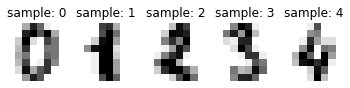

In [15]:
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:5]):
  plt.subplot(1, 5, index+1)  # nrows=2, ncols=1, index=1
  plt.axis('off')             # 축 제거
  plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  plt.title('sample: %i' % label)

**digits.images**는 모든 샘플을 $8\times 8$ 행렬로 저장한다. <br>
이와 다르게 **digits.data**는 해당 행렬을 64차원의 벡터로 변환해서 저장한다.

In [16]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


x(특성 행렬)과 y(레이블)을 선언해보자.

In [17]:
x = digits.data
y = digits.target

[0 1 2 ... 8 9 8]


## <strong> 2. 다층 퍼셉트론 분류기 만들기 </strong>

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss() # including Softmax / == nn.functional.cross_entropy() [softmax 3장 참고]
optimizer = optim.Adam(model.parameters())
losses = []

for epoch in range(100):
  y_pred = model(x)
  loss = loss_fn(y_pred, y)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))
    
  losses.append(loss.item())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


Epoch    0/100 Cost: 2.698668
Epoch   20/100 Cost: 1.998588
Epoch   40/100 Cost: 1.496816
Epoch   60/100 Cost: 0.932948
Epoch   80/100 Cost: 0.500194


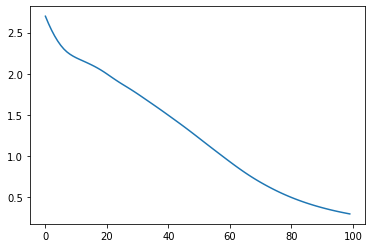

In [24]:
# loss 추세
plt.plot(losses)

출처: https://wikidocs.net/61046